In [2]:
import sys
import os
import math
import time

import numpy as np
from scipy import constants
import seaborn as sb
import matplotlib.pyplot as plt
from spectral import *
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from my_library import *

h = constants.h
c = constants.c
e = math.e
pi = math.pi
k = constants.k


In [3]:
def load_flux(fluxname):

    with open(fluxname, 'r') as file:
        data = file.readlines()
        #print(data)
        size = len(data)
        #print(size)
        flux = np.zeros(size)
        wavelengths = np.zeros(size)
        for i in range(size):
            flux[i]=(float(data[i].strip().split(" ,")[1]))
            wavelengths[i]=(float(data[i].strip().split(",")[0]))

    return flux,wavelengths

def rad_list(xp,yp):
    rad = np.zeros(len(wavelengths))
    for i in range(len(wavelengths)):
        rad[i] = img_open[xp,yp,i+5]
    
    return rad

In [4]:
filename = '../Data/Von Karman/CH1M3_0003/l1b/m3g20081129t171509_v03_rdn'

#distance for pparticular l1b data
distance = 0.983750743393

# Load solar flux
flux, wavelengths = load_flux('../Data/m3_solarflux.txt')
flux = flux/(np.pi*(distance)**2)
#wavelengths = wavelengths[:85]
wavelengths = np.array(wavelengths)
wavelengths = wavelengths/1e3
#print(wavelengths)

#start = time.time()
# Load spectrum data
img = envi.open(filename + '.hdr')
print(img)

# Data in 3D-array 
img_open = img.open_memmap(writeable = False)

	Data Source:   './../Data/Von Karman/CH1M3_0003/l1b/m3g20081129t171509_v03_rdn.img'
	# Rows:           5636
	# Samples:         304
	# Bands:            85
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


/home/sourav/.local/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


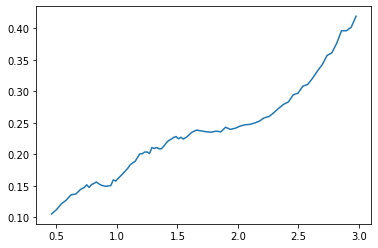

In [5]:
def plot(x,y):
    # Radiance
    rad = img_open[x,y,:]
    #plt.plot(np.arange(0,85,1), rad)
    ################### Reflectance #######################
    ref = rad/flux
    plt.plot(wavelengths,ref)
    
def scatter(x,y):
    # Radiance
    rad = img_open[x,y,:85]
    plt.scatter(wavelengths, rad, marker='x')
img_open.shape
#scatter(72,132)
plot(72,132)
plt.show()

In [6]:
filename1 = '../Data/Von Karman/m3_reflectance data/m3g20081129t171509_v01_rfl'

img_m3_refl = envi.open(filename1+'.hdr')
img_open_m3_refl = img_m3_refl.open_memmap(writeable=False)
#plt.plot(wavelengths, img_open_ref_refl[0,0])
#plt.show()

# Apollo 16 reflectance data(62231) as reference reflectance for initial guess of T
ref_refl_file = open('../Data/62231_reflectance/c1lr99.tab','r')
ref_refl_open=[]
for line in ref_refl_file.readlines()[1:462]:
        ref_refl_open.append([float(j) for j in line.split()])
ref_refl_open=np.transpose(ref_refl_open)
ref_wav = ref_refl_open[0]/1e3
ref_refl = ref_refl_open[1]


/home/sourav/.local/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [7]:
filename2 = '../Data/Von Karman/m3_reflectance data/m3g20081129t171509_v01_sup'

img_sup = envi.open(filename2+'.hdr')
img_open_sup = img_sup.open_memmap(writeable=False)

#print(img_open_sup[72,132])
#print(img_open_sup[192,99])
#print(img_open_sup[5521,286])
#plt.plot(wavelengths[10:], img_open_sup[0,0,10:])
#plt.show()

In [8]:

#initial guess of T calculation


#L = a*R*E + beta * B

def fun_re(ref, sflux):
    re = (ref * sflux)
    return re
def fun_are(ref, sflux, a):
    are = (a * fun_re(ref, sflux))
    return are

def fun_bb(wav, T):
    wav = wav*1e-6
    h = 6.626e-34
    pi = np.pi
    c = 3.0e+8
    k = 1.38e-23
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    radiance = a/ ( (wav**5) * (np.exp(b) - 1.0) )      #in W/m2.Sr.m
    radiance = radiance/1e6     #in W/m2.Sr.um
    #print(radiance)
    return radiance



def fun_betab(wav, beta, T):
    betab = (beta * fun_bb(wav, T))
    return betab


def fun_L(X , a, beta, T):
    ref, sflux1, wav = X
    c = fun_are(ref,sflux1, a)
    b = fun_betab(wav, beta, T)
    l = c + b
    return l


Pixel position(row, col) =  72 ,  132
Radiance value at band no. 75 = 4.522518
Fitted Value of temperature(Wohler approach)=  372.169835904986
Temperature published on ODE(Clark Approach) =  370.7186
Fitted emissivity=  0.9500000000000001


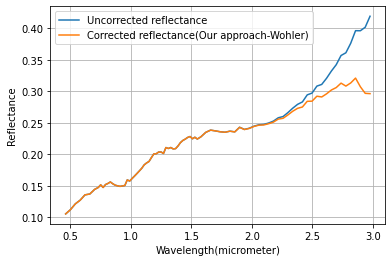

Pixel position(row, col) =  192 ,  99
Radiance value at band no. 75 = 2.0160422
Fitted Value of temperature(Wohler approach)=  328.90306761445953
Temperature published on ODE(Clark Approach) =  293.92896
Fitted emissivity=  0.9500000000000001


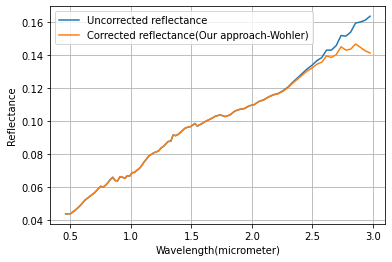

Pixel position(row, col) =  5566 ,  231
Radiance value at band no. 75 = 0.91180605
Fitted Value of temperature(Wohler approach)=  106.17369349290988
Temperature published on ODE(Clark Approach) =  0.1
Fitted emissivity=  0.9588712356884489


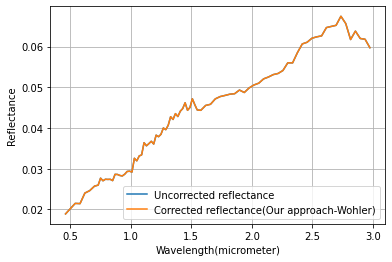

Pixel position(row, col) =  200 ,  99
Radiance value at band no. 75 = 2.2272213
Fitted Value of temperature(Wohler approach)=  328.0740889924382
Temperature published on ODE(Clark Approach) =  248.53035
Fitted emissivity=  0.9500000000000001


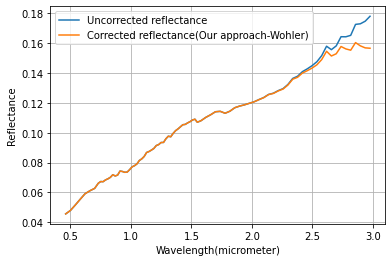

Pixel position(row, col) =  15 ,  99
Radiance value at band no. 75 = 3.061378
Fitted Value of temperature(Wohler approach)=  371.4421894982973
Temperature published on ODE(Clark Approach) =  368.45905
Fitted emissivity=  0.9500000000000001


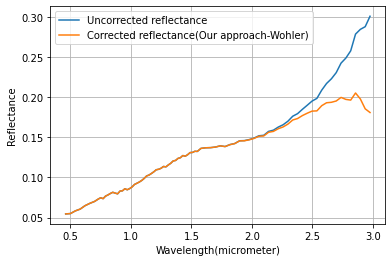

Pixel position(row, col) =  0 ,  50
Radiance value at band no. 75 = 2.4739897
Fitted Value of temperature(Wohler approach)=  338.8407523549208
Temperature published on ODE(Clark Approach) =  349.43085
Fitted emissivity=  0.9500000000000219


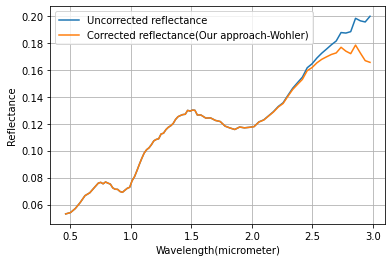

Pixel position(row, col) =  3091 ,  264
Radiance value at band no. 75 = 3.3506827
Fitted Value of temperature(Wohler approach)=  355.8074644021354
Temperature published on ODE(Clark Approach) =  353.68405
Fitted emissivity=  0.9500000000000001


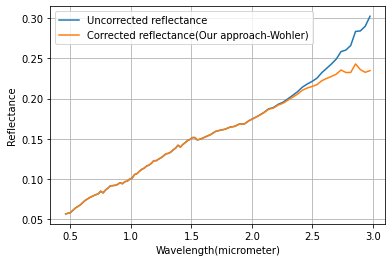

Pixel position(row, col) =  2838 ,  264
Radiance value at band no. 75 = 1.9882094
Fitted Value of temperature(Wohler approach)=  349.5410384170415
Temperature published on ODE(Clark Approach) =  344.10846
Fitted emissivity=  0.9500000000000003


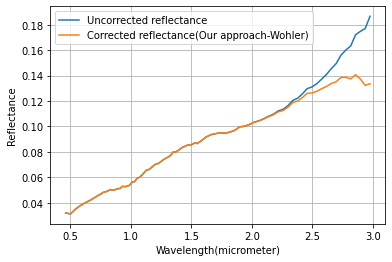

Pixel position(row, col) =  3011 ,  120
Radiance value at band no. 75 = 1.4970025
Fitted Value of temperature(Wohler approach)=  56.07313193684638
Temperature published on ODE(Clark Approach) =  0.1
Fitted emissivity=  0.9511956228321514


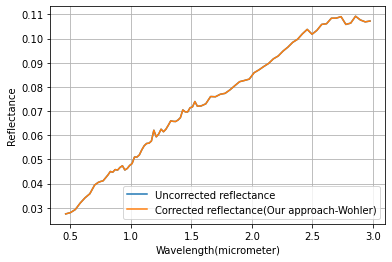

In [9]:
def thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl, row, col):
        obs_rad = img_open[row,col,:]       
        new_wavelengths, ref_refl1  = wavelength_data_range_select(ref_wav, ref_refl, 2.400, 2.600)
        params = np.polyfit(new_wavelengths, ref_refl1, 1)
        #print(params)
        new_wavelengths, sflux = wavelength_data_range_select(wavelengths, flux, 2.377, 2.936)
        new_wavelengths, obs_rad1 = wavelength_data_range_select(wavelengths, obs_rad, 2.377, 2.936)
        fit_refl = []
        for i in range(len(new_wavelengths)):
            fit_refl.append((params[0]*new_wavelengths[i]) + params[1])
        new_wavelengths = np.array(new_wavelengths)
        fit_refl = np.array(fit_refl)
        obs_rad1 = np.array(obs_rad1)
        sflux = np.array(sflux)
        obs_rad = np.array(obs_rad)
        wavelengths = np.array(wavelengths)
        #CURVE FIT
        popt,pcov = curve_fit(fun_L,(fit_refl,sflux,new_wavelengths),obs_rad1, bounds=((0.01,.95,25),(1,1.0,480)))
        new_corr_rad = obs_rad - (popt[1] * fun_bb(wavelengths, popt[2]))
        print("Pixel position(row, col) = ", row,', ',col)
        print('Radiance value at band no. 75 =', img_open[row,col,75])
        print("Fitted Value of temperature(Wohler approach)= ", popt[2])
        print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[row,col,1]))
        
        print("Fitted emissivity= ",popt[1])
        #print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[row,col,1]))


        plt.plot(wavelengths,obs_rad/flux,label="Uncorrected reflectance")
        plt.plot(wavelengths, new_corr_rad/flux,label="Corrected reflectance(Our approach-Wohler)")
        #plt.plot(wavelengths[2:],img_open_m3_refl[row,col,2:],label="Reflectence data(Clark)")
        plt.xlabel("Wavelength(micrometer)")
        plt.ylabel("Reflectance")
        plt.legend()
        plt.grid()
        plt.show()
        #return new_corr_rad, popt


#print('radiance value at band no. 75 =', img_open[72,132,75])
#print("m3 derived temperature = ",(img_open_sup[72,132,1]))
a=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,72,132)
#print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[72,132,1]))

#print("pixel value = 192,99")
#print('radiance value at band no. 75 =', img_open[192,99,75])
#print("m3 derived temperature = ",(img_open_sup[192,99,1]))
b=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,192,99)
#print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[192,99,1]))

#print("pixel value = 5521,286")
#print('radiance value at band no. 75 =', img_open[5521,286,75])
#print("m3 derived temperature = ",(img_open_sup[5521,286]))
#c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,5521,286)
#
#print("pixel value = 5566,231")
#print('radiance value at band no. 75 =', img_open[5566,231,75])
#print("m3 derived temperature = ",(img_open_sup[5566,231,1]))
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,5566,231)
#print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[5566,231,1]))

#print("pixel value = 200,99")
#print('radiance value at band no. 75 =', img_open[200,99,75])
#print("m3 derived temperature = ",(img_open_sup[200,99,1]))
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,200,99)
#print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[200,99,1]))

#

#print("pixel value = 15,99")
#print('radiance value at band no. 75 =', img_open[15,99,75])
#print("m3 derived temperature = ",(img_open_sup[15,99,1]))
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,15,99)
#print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[15,99,1]))

#print("pixel value = 0,50")
#print('radiance value at band no. 75 =', img_open[0,50,75])
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,0,50)
#print("Temperature published on ODE(Clark Approach) = ",(img_open_sup[0,50,1]))
#3106,242,75
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,3091,264)
#sb.heatmap(img_open[:,:,75], square=True,cmap='gray')
#plt.show()
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,2838,264)
c=thermal_correction(wavelengths, img_open, flux ,ref_wav, ref_refl,3011,120)

In [10]:
#sb.heatmap(img_open[3011:3166,:120,75], cmap= 'gray')# square=True)
##sb.heatmap(img_open_m3_refl[3091:3106,240:242,75], cmap= 'gray')#, square=True)
#print(img_open[3011,120,75])
#print(wavelengths[75])

/tmp/ipykernel_224710/3126331269.py:21: RuntimeWarning: overflow encountered in exp
  radiance = a/ ( (wav**5) * (np.exp(b) - 1.0) )      #in W/m2.Sr.m


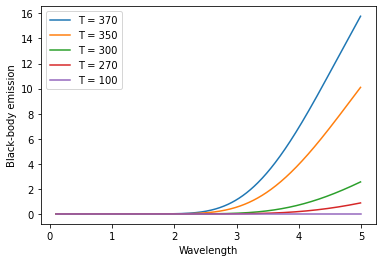

In [22]:
X = np.arange(0.1,5,0.01)
temp = [370,350,300,270,100]
for i in range(len(temp)):
    Y = fun_bb(X,temp[i])
    plt.plot(X,Y,label='T = %s' %temp[i])
plt.xlabel('Wavelength')
plt.ylabel('Black-body emission')
plt.legend()
plt.show()

In [ ]:
def find(data):
    indexes1 = []
    for i in range(500):
        for j in range(300):
            indexes = []
            if img_open[i,j,75] >= data-.05 and img_open[i,j,75] <= data+.05:
                #print(img_open_refl[i,j,75])
                indexes.append(i)
                indexes.append(j)
                indexes1.append(indexes)

find(2.5)